In [52]:
import autograd.numpy as ag_np
from train_valid_test_loader import load_train_valid_test_datasets
import matplotlib.pyplot as plt
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem
import pandas as pd



In [53]:
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

k_values = [2, 10, 50]
alpha_values = 0
results = []


In [54]:
# train for each combination of k and alpha

# Initialize model
model = CollabFilterOneVectorPerItem(
    n_epochs=120, batch_size=1000, step_size=200,
    n_factors=2, alpha = 0
)
model.init_parameter_dict(n_users, n_items, train_tuple)
model.fit(train_tuple, valid_tuple)
valid_perf = model.evaluate_perf_metrics(*valid_tuple)
test_perf = model.evaluate_perf_metrics(*test_tuple)
results.append({
    "valid_MAE": valid_perf['mae'],
    "test_MAE": test_perf['mae']
        
})
print(f"Validation MAE: {valid_perf['mae']}")
print(f"Test MAE: {test_perf['mae']}")


epoch       0.000 | loss_total     0.00351 | train_MAE     1.65330 | valid_MAE     1.66213 | grad_wrt_mu     0.00295 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     0.00214 | train_MAE     1.26747 | valid_MAE     1.27429 | grad_wrt_mu     0.00191 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     0.00168 | train_MAE     1.01743 | valid_MAE     1.02295 | grad_wrt_mu     0.00129 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     0.00137 | train_MAE     0.97591 | valid_MAE     0.97908 | grad_wrt_mu     0.00059 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.00125 | train_MAE     0

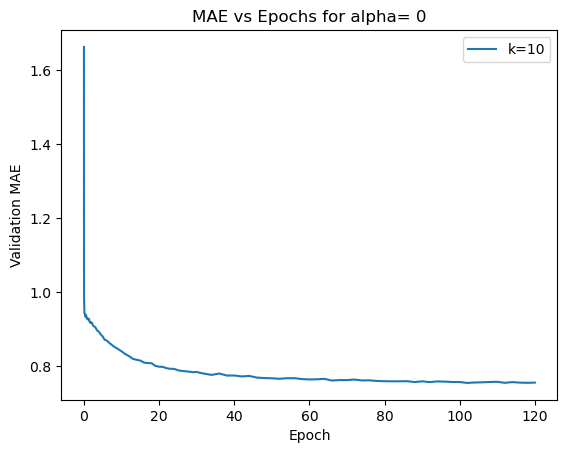

In [ ]:

plt.figure()
#epochs = range(len(model.trace_mae_valid))
plt.plot(model.trace_epoch, model.trace_mae_valid, label=f"k={2}")
plt.title(f"MAE vs Epochs for alpha= 0")
plt.xlabel("Epoch")
plt.ylabel("Validation MAE")
plt.legend()
plt.show()

Part 1B 

epoch       0.000 | loss_total   185.92209 | train_MAE     1.65330 | valid_MAE     1.66213 | grad_wrt_mu     0.00293 | grad_wrt_b_per_user     0.09430 | grad_wrt_c_per_item     0.16820 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total   180.36916 | train_MAE     1.67607 | valid_MAE     1.68505 | grad_wrt_mu     0.00308 | grad_wrt_b_per_user     0.09341 | grad_wrt_c_per_item     0.16537 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total   174.98918 | train_MAE     1.69850 | valid_MAE     1.70762 | grad_wrt_mu     0.00312 | grad_wrt_b_per_user     0.09253 | grad_wrt_c_per_item     0.16259 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total   169.77708 | train_MAE     1.72061 | valid_MAE     1.72987 | grad_wrt_mu     0.00334 | grad_wrt_b_per_user     0.09165 | grad_wrt_c_per_item     0.15985 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total   141.73174 | train_MAE     1

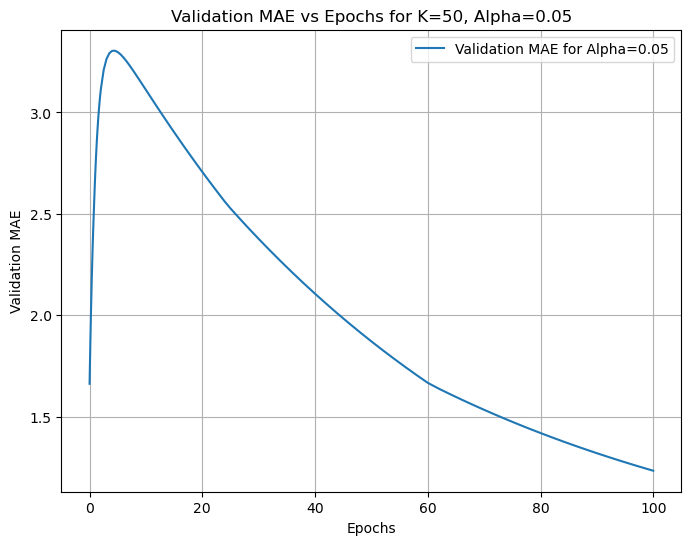

In [ ]:
# Train model for K = 50, alpha > 0
alpha_values = [0.1]
best_alpha = None
best_valid_mae = float('inf')
results_alpha = []

for alpha in alpha_values:
    # Initialize and train model
    model = CollabFilterOneVectorPerItem(
        n_epochs=100, batch_size=1000, step_size=.1,
        n_factors=50, alpha=alpha
    )
    model.init_parameter_dict(n_users, n_items, train_tuple)
    model.fit(train_tuple, valid_tuple)
    
    # Evaluate performance
    valid_perf = model.evaluate_perf_metrics(*valid_tuple)
    test_perf = model.evaluate_perf_metrics(*test_tuple)
    
    # Save results
    results_alpha.append({
        "alpha": alpha,
        "valid_MAE": valid_perf['mae'],
        "test_MAE": test_perf['mae'],
        "trace_epoch": model.trace_epoch,
        "trace_mae_valid": model.trace_mae_valid
    })
    
    # Check for best alpha based on validation MAE
    if valid_perf['mae'] < best_valid_mae:
        best_alpha = alpha
        best_valid_mae = valid_perf['mae']

# Print results
print(f"Best Alpha: {best_alpha}")
for result in results_alpha:
    print(f"Alpha: {result['alpha']}, Validation MAE: {result['valid_MAE']}, Test MAE: {result['test_MAE']}")

# Plot validation MAE for the best alpha
for result in results_alpha:
    if result["alpha"] == best_alpha:
        plt.figure(figsize=(8, 6))
        plt.plot(result["trace_epoch"], result["trace_mae_valid"], label=f"Validation MAE for Alpha={best_alpha}")
        plt.title(f"Validation MAE vs Epochs for K=50, Alpha={best_alpha}")
        plt.xlabel("Epochs")
        plt.ylabel("Validation MAE")
        plt.legend()
        plt.grid()
        plt.show()


Questions for Office Hours: 
- Why is there almost no difference in performance for when we change k? Part 1 
- All control we have is: step size, num epochs, alpha, k, other implementation is correct? 
- check collab filter implementation 